## **1. Importing Libraries**

In [1]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# For models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# For evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# For pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# For saving the model
import pickle


## **2. Data Loading & Preprocessing**

#### **2.1 Loading Data**

In [2]:
df = pd.read_csv('./dataset/car data.csv')

- Making copy of dataframe

In [3]:
df_copy = df.copy()

#### **2.2 First five rows**

In [4]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### **2.3 Column names**

In [5]:
print(df.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


#### **2.4 Shape of the data**

In [6]:
rows, columns = df.shape


In [7]:
print(f"There are {rows} rows in the dataset")
print(f"There are {columns} columns in the dataset")

There are 301 rows in the dataset
There are 9 columns in the dataset


#### **2.5 info()**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### **2.6 Statistical summary of the data**

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#### **2.7 Handling  Missing Values**

In [10]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

#### **2.8 Removing Duplicates**

In [11]:
df.duplicated().sum()

np.int64(2)

In [12]:
df.drop_duplicates(inplace=True)

#### **2.9 Handling Outliers**

<Axes: >

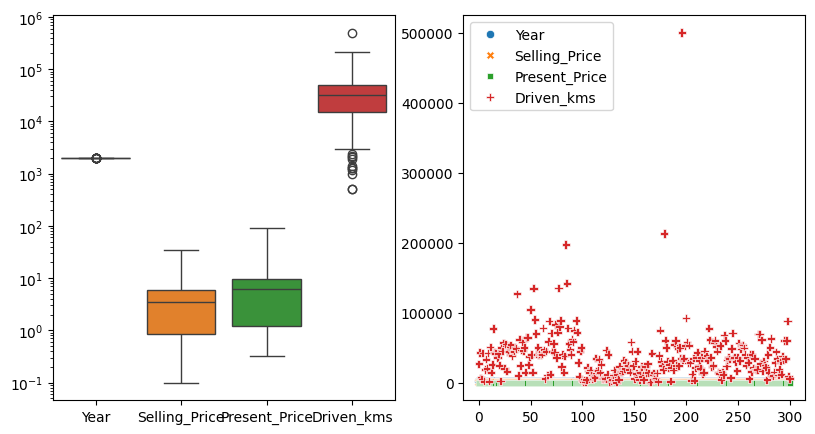

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)

plt.yscale("log")
sns.boxplot(df.iloc[:,1:5])

plt.subplot(1, 3, 2)
sns.scatterplot(df.iloc[:,1:5])

> As `Year` column is not visible properly so we'll see it in a separate graph

<Axes: >

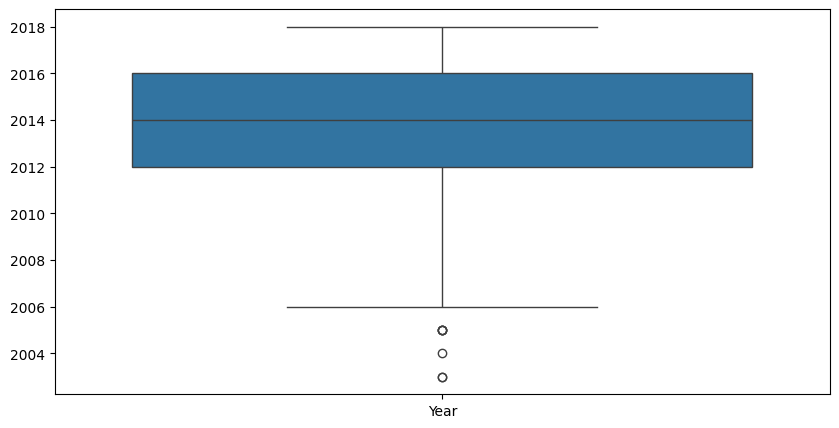

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(df.iloc[:,[1]])

So `Driven_kms` and `Year` both columns have few outliers which we will handle next

In [15]:
Q1 = df["Driven_kms"].quantile(0.25)
Q3 = df["Driven_kms"].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

print(upper_limit)
print(lower_limit)

99708.75
-35825.25


>  ***IQR method will not work as our lower limit is -ve and our outliers are positive so it's not going to help us in capping the outliers***

- Lets apply percentile technique to handle outliers

In [16]:
upper_limit = df["Driven_kms"].quantile(0.96)
lower_limit = df["Driven_kms"].quantile(0.04)

print(upper_limit)
print(lower_limit)

88079.99999999999
3000.0


In [17]:
df["Driven_kms"] = np.where(
    df["Driven_kms"] >= upper_limit,
    upper_limit,
    np.where(
        df["Driven_kms"] <= lower_limit,
        lower_limit,
        df["Driven_kms"]
    )
)

<Axes: >

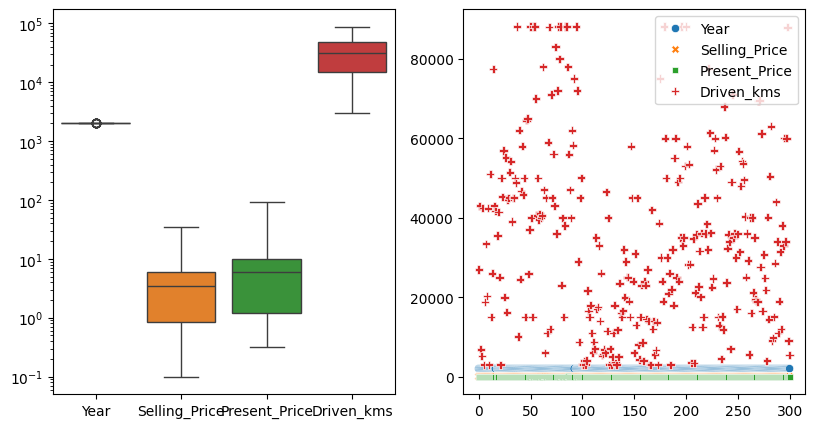

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)

plt.yscale("log")

sns.boxplot(df.iloc[:,1:5])

plt.subplot(1, 3, 2)
sns.scatterplot(df.iloc[:,1:5])

In [19]:
Q1 = df["Year"].quantile(0.25)
Q3 = df["Year"].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

print(upper_limit)
print(lower_limit)

2022.0
2006.0


In [20]:
df["Year"] = np.where(
    df["Year"] >= upper_limit,
    upper_limit,
    np.where(
        df["Year"] <= lower_limit,
        lower_limit,
        df["Year"]
    )
)

<Axes: >

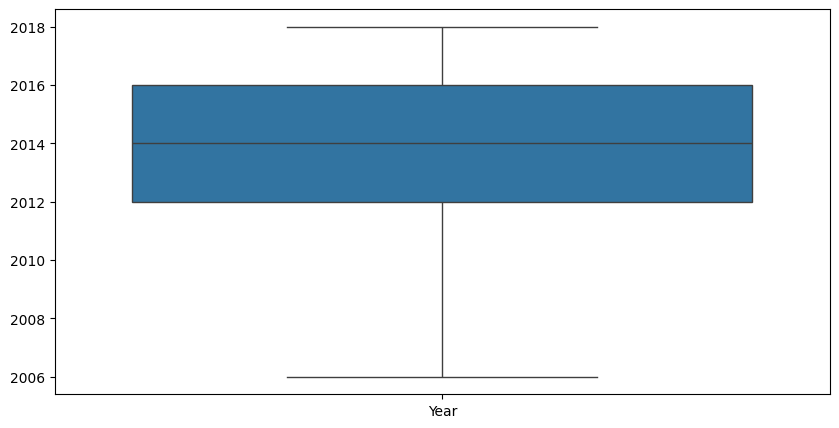

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(df.iloc[:,[1]])

>  ***So we have successfully removed outliers from `Year` and `Driven_kms`***

## **3: Feature Engineering**

#### **3.1 Converting Date Features**

In [22]:
df['Car_Age'] = 2024 - df['Year']
df.drop('Year', axis=1, inplace=True)

#### **3.2 Encoding Categorical Features**

In [23]:
ohe = OneHotEncoder(sparse_output=False)

ohe_encoded = ohe.fit_transform(df[['Fuel_Type', 'Selling_type', 'Transmission']])

In [24]:
ohe_encoded_df = pd.DataFrame(ohe_encoded, columns=ohe.get_feature_names_out())

In [25]:
df = df.reset_index(drop=True)
ohe_encoded_df = ohe_encoded_df.reset_index(drop=True)

In [26]:
df = pd.concat([df, ohe_encoded_df], axis=1)

- Removing unwanted and encoded categorical columns

In [27]:
df.drop(columns=["Car_Name", "Fuel_Type", "Transmission", "Selling_type"], inplace=True)

## **4: Feature Selection**

#### **4.1 Correlation Matrix**

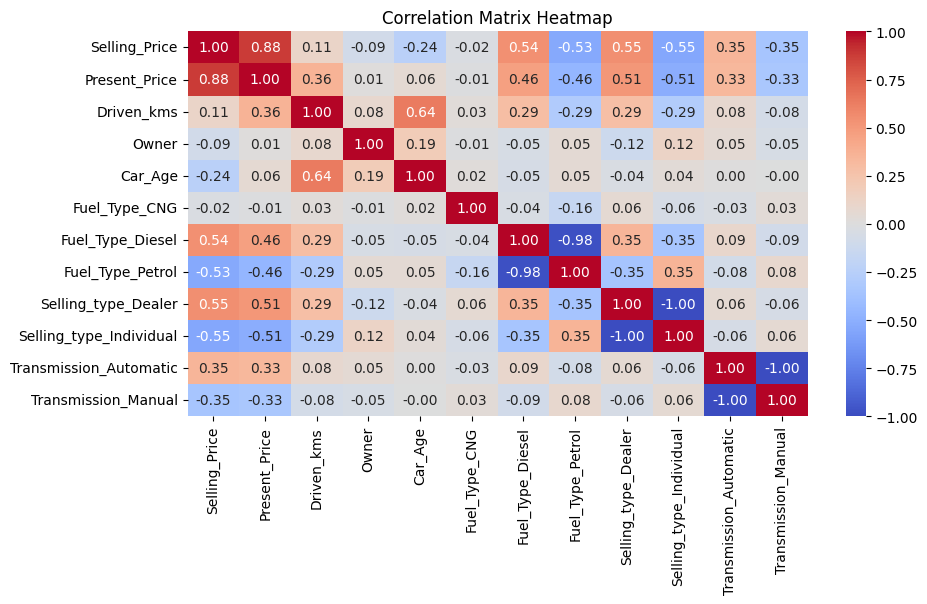

In [28]:
corr = df.iloc[:, :].corr()

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

#### **4.2 Removing Irrelevant Features**

In [29]:
X = df.iloc[:, 1:]

In [30]:
y = df.iloc[:, 0]

In [31]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

                    Feature  Importance
0             Present_Price    0.877330
3                   Car_Age    0.084791
1                Driven_kms    0.018415
9    Transmission_Automatic    0.004832
8   Selling_type_Individual    0.004040
7       Selling_type_Dealer    0.002923
5          Fuel_Type_Diesel    0.002459
6          Fuel_Type_Petrol    0.002424
10      Transmission_Manual    0.001683
2                     Owner    0.001102
4             Fuel_Type_CNG    0.000001


In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5)  # Specify the number of features to keep
rfe.fit(X, y)

# Get the ranking of features
ranking = rfe.ranking_
features_rfe = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})
features_rfe = features_rfe[features_rfe['Ranking'] == 1]  # Get the selected features
print(features_rfe)


                    Feature  Ranking
5          Fuel_Type_Diesel        1
7       Selling_type_Dealer        1
8   Selling_type_Individual        1
9    Transmission_Automatic        1
10      Transmission_Manual        1


In [33]:
from sklearn.feature_selection import SelectKBest, f_regression


selector = SelectKBest(score_func=f_regression, k='all')  # or specify a number like 5
X_new = selector.fit_transform(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)


                    Feature       Score
0             Present_Price  982.682498
8   Selling_type_Individual  131.417193
7       Selling_type_Dealer  131.417193
5          Fuel_Type_Diesel  124.537512
6          Fuel_Type_Petrol  117.016379
9    Transmission_Automatic   41.156813
10      Transmission_Manual   41.156813
3                   Car_Age   17.596462
1                Driven_kms    3.773950
2                     Owner    2.311575
4             Fuel_Type_CNG    0.179352


In [34]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


                    Feature  Importance
0             Present_Price    0.875814
3                   Car_Age    0.087014
1                Driven_kms    0.022655
10      Transmission_Manual    0.003967
5          Fuel_Type_Diesel    0.002626
7       Selling_type_Dealer    0.002384
6          Fuel_Type_Petrol    0.002011
8   Selling_type_Individual    0.001510
9    Transmission_Automatic    0.001392
2                     Owner    0.000620
4             Fuel_Type_CNG    0.000008


In [35]:
from sklearn.feature_selection import SelectKBest, f_regression


# Apply SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')  # You can set k to the number of features you want to keep
X_new = selector.fit_transform(X, y)

# Get the scores and feature names
scores = selector.scores_
feature_names = X.columns
feature_scores = pd.DataFrame({'Feature': feature_names, 'Score': scores})

# Sort the features by their score
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)


                    Feature       Score
0             Present_Price  982.682498
8   Selling_type_Individual  131.417193
7       Selling_type_Dealer  131.417193
5          Fuel_Type_Diesel  124.537512
6          Fuel_Type_Petrol  117.016379
9    Transmission_Automatic   41.156813
10      Transmission_Manual   41.156813
3                   Car_Age   17.596462
1                Driven_kms    3.773950
2                     Owner    2.311575
4             Fuel_Type_CNG    0.179352


In [36]:
X.drop(columns=["Driven_kms", "Owner", "Car_Age", "Fuel_Type_CNG"], axis=1, inplace=True)

>  ***By using both correlation matrix and Kbest feature selection technique it's clear that: <li> `Driven_kms` , `Car_Age`, `Owner` and `Fuel_Type_CNG` is irrelevant feature to predict the car's `*Selling Price*` <li> So we'll remove all these features***

## **5: Data Scaling**

In [37]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## **6: Train-Test Split**

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=140)

> ***By experimenting multiple times now I'm selecting the `random_state` value to `140` as it's giving consistent result for Linear regression model in both training and testing***

## **7: Model Selection and Training**

In [39]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Support Vector Regressor
svr = SVR()
svr.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## **8: Model Evaluation**

In [40]:
for model in [lr, rf, svr, dt, xgb]:
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    # print(f"{model.__class__.__name__} Train MSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
    # print(f"{model.__class__.__name__} Test MSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")
    # print(f"{model.__class__.__name__} R² Score: {r2_score(y_test, y_pred_test)}")
    print(f"{model.__class__.__name__} Training Accuracy/Score: {train_accuracy:.2f}")
    print(f"{model.__class__.__name__} Testing Accuracy/Score: {test_accuracy:.2f}")
    # Calculate and print model accuracy on train and test sets
    print("              ***********************               ")

LinearRegression Training Accuracy/Score: 0.81
LinearRegression Testing Accuracy/Score: 0.81
              ***********************               
RandomForestRegressor Training Accuracy/Score: 0.95
RandomForestRegressor Testing Accuracy/Score: 0.77
              ***********************               
SVR Training Accuracy/Score: 0.49
SVR Testing Accuracy/Score: 0.66
              ***********************               
DecisionTreeRegressor Training Accuracy/Score: 0.98
DecisionTreeRegressor Testing Accuracy/Score: 0.76
              ***********************               
XGBRegressor Training Accuracy/Score: 0.98
XGBRegressor Testing Accuracy/Score: 0.76
              ***********************               


In [41]:
y_pred = lr.predict(X_test)
y_pred

array([ 0.32035796,  7.24146483,  5.17919661,  7.41433408,  0.32035796,
        7.03643385,  4.49978024,  5.17919661, 17.30320058,  0.42086334,
        0.20377172,  4.29876947,  5.75398518,  2.60786044,  7.24146483,
        3.58317116,  0.21985258,  3.18114963,  4.66460906,  8.87367222,
        2.48163217,  4.21434495,  0.58971238,  0.33643882,  0.30025688,
        7.05251471,  4.12992043, 15.20464822,  4.26660775,  0.32437817,
        4.13394065,  4.77717509,  3.69171697,  6.25651209,  0.38066119,
        4.12992043, 12.94528724,  7.80027475,  0.34849946,  0.58971238,
        7.9000193 ,  4.13394065,  4.77717509,  6.14404828,  7.46257667,
        0.18769085,  1.76677241,  4.21434495,  3.77212127,  0.32839839,
       19.45401575,  7.63544592,  5.3601063 ,  8.88181487,  0.35251968,
        3.73191912,  3.80026278,  1.74265111,  7.24146483,  0.22789301])

>  ***As you can clearly see:<li> `LinearRegression` is the best model for our data as it is not underfitting or overfitting to our data but `XGBRegressor` and `DecisionTreeRegressor` and `RandomForestRegressor` are clearly overfitting while `SVR` is underfitting model for our data***

## **9: ML Pipeline**

#### ***9.1 Pipeline Creation***

In [42]:
df_copy = df_copy[df_copy["Fuel_Type"] != 'CNG']
df_copy.drop(columns=["Car_Name", "Year", "Driven_kms", "Owner"], axis=1, inplace=True)

In [43]:
df_copy

,Selling_Price,Present_Price,Fuel_Type,Selling_type,Transmission
0,3.35,5.59,Petrol,Dealer,Manual
1,4.75,9.54,Diesel,Dealer,Manual
2,7.25,9.85,Petrol,Dealer,Manual
3,2.85,4.15,Petrol,Dealer,Manual
4,4.60,6.87,Diesel,Dealer,Manual
...,...,...,...,...,...
296,9.50,11.60,Diesel,Dealer,Manual
297,4.00,5.90,Petrol,Dealer,Manual
298,3.35,11.00,Petrol,Dealer,Manual
299,11.50,12.50,Diesel,Dealer,Manual


In [44]:
X = df_copy.iloc[:, 1:]
y = df_copy.iloc[:, 0]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=140)

In [46]:
X_train

,Present_Price,Fuel_Type,Selling_type,Transmission
77,12.35,Petrol,Dealer,Automatic
102,1.78,Petrol,Individual,Manual
57,18.54,Petrol,Dealer,Manual
39,7.98,Petrol,Dealer,Manual
54,10.21,Petrol,Individual,Manual
...,...,...,...,...
162,0.99,Petrol,Individual,Manual
82,25.39,Diesel,Dealer,Automatic
152,0.99,Petrol,Individual,Manual
168,0.73,Petrol,Individual,Manual


In [47]:
ohe = ohe=OneHotEncoder()
ohe.fit(X_train.iloc[:,[1,2,3]])

OneHotEncoder()

In [48]:
columns_trans = make_column_transformer(
    (
        StandardScaler(), [0]),
        (OneHotEncoder(categories=ohe.categories_), [1,2,3]),
        remainder='passthrough'
    )

In [49]:
pipeline = make_pipeline(columns_trans, lr)

In [50]:
# Fit pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(), [0]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Diesel', 'Petrol'], dtype=object),
                                                                            array(['Dealer', 'Individual'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object)]),
                                                  [1, 2, 3])])),
                ('linearregression', LinearRegression())])

#### ***9.2 Pipeline Testing***

In [51]:
# Predict
y_pred = pipeline.predict(X_test)
y_pred

array([ 0.35723628,  7.39602074,  5.167088  ,  7.56596068,  0.35723628,
        7.19446407,  6.29465257,  5.167088  , 16.94944469,  0.45603857,
        0.24262562,  4.30157993,  5.93374684,  2.60597642,  7.39602074,
        3.59810762,  0.25843399,  3.20289846,  4.66122027,  9.00056995,
        7.38147777,  4.21858601,  0.62202642,  0.37304465,  0.33747582,
        4.13954417,  4.13559208, 14.88645285,  4.2699632 ,  0.36118837,
       19.06381372,  4.77187884,  3.70481409, 11.77225158,  0.41651766,
        4.13559208, 15.53839178,  7.94536148,  0.38490092,  0.62202642,
       11.64578465,  7.25379239,  4.77187884,  6.11558999,  7.61338578,
        0.22681726,  1.44132785,  4.21858601,  3.78385593,  0.36514046,
       19.06381372,  7.78332572,  5.34493212,  8.8069644 ,  0.38885301,
        3.74433501,  3.81152057,  1.4176153 ,  7.39602074,  0.26633817])

## **10: Save the Model**

In [52]:
pickle.dump(pipeline,open('./model/LinearRegressionModel.pkl','wb'))

## **11: Loading & Testing the Model**

In [53]:
model = pickle.load(open("./model/LinearRegressionModel.pkl", "rb"))

In [54]:
X_test.head(1)

,Present_Price,Fuel_Type,Selling_type,Transmission
127,0.8,Petrol,Individual,Manual


In [55]:
columns = X_test.columns

In [56]:
prediction = model.predict(pd.DataFrame(columns=columns,data=np.array([100, 'Diesel','Dealer',"Automatic"]).reshape(1,4)))
prediction

array([44.37300857])

# <center> ***<u> *********Notebook End********* </u>*** </center>